ASSIGNMENT 1 - 
Name : Chairani Tiara Sayyu
Matrix Number : P104718

In [ ]:
import sys
import nltk

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df = pd.read_csv('dataset.csv')
df = df[['text','humor']]
df.head(20)

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
5,"Martha stewart tweets hideous food photo, twit...",False
6,What is a pokemon master's favorite kind of pa...,True
7,Why do native americans hate it when it rains ...,True
8,"Obama's climate change legacy is impressive, i...",False
9,"My family tree is a cactus, we're all pricks.",True


In [ ]:
df.shape

(70540, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70540 entries, 0 to 70539
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    70540 non-null  object
 1   humor   70539 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
df.index = range(70540)
df['text'].apply(lambda x: len(x.split(' '))).sum()

845911

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


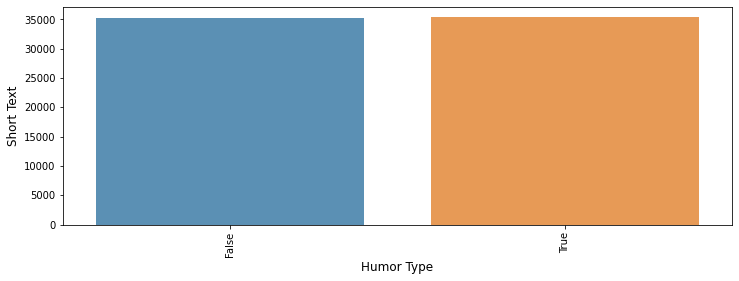

In [ ]:
cnt_pro = df['humor'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Short Text', fontsize=12)

plt.xlabel('Humor Type', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [ ]:
def print_requirementFeedback(index):
    #example = df[df.index == index][['text', 'humor']].values[0]
    example = df[df.index == index][['text', 'humor']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Humor Type:', example[1])
print_requirementFeedback(12)

Want to know why athletes chose to #takeaknee? look at our broken justice system
Humor Type: False


DATA PRE PROCESSING

In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['text'] = df['text'].apply(cleanText)

In [ ]:
df.head()

,text,humor
0,"joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,watch: darvish gave hitter whiplash with slow ...,False
2,what do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"pasco police shot meican migrant from behind, ...",False


In [ ]:
df['text'].head()

0    joe biden rules out 2020 bid: 'guys, i'm not r...
1    watch: darvish gave hitter whiplash with slow ...
2    what do you call a turtle without its shell? d...
3        5 reasons the 2016 election feels so personal
4    pasco police shot meican migrant from behind, ...
Name: text, dtype: object

In [ ]:
df.head()

,text,humor
0,"joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,watch: darvish gave hitter whiplash with slow ...,False
2,what do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"pasco police shot meican migrant from behind, ...",False


BUILDING LEXICON SENTIMENT

In [ ]:
new_data = df[df['humor']=='True']
print(new_data)

Empty DataFrame
Columns: [text, humor]
Index: []


In [ ]:
# install spacy: conda install -c conda-forge spacy
import spacy
# go to anaconda prompt(run as admin):python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')
text_string = str(df.text)
doc = nlp(text_string)
for token in doc:
    print(token.text,  token.pos_)

0 PUNCT
         SPACE
joe PROPN
biden PROPN
rules VERB
out ADP
2020 NUM
bid NOUN
: PUNCT
' PUNCT
guys NOUN
, PUNCT
i PRON
'm AUX
not PART
r NOUN
... PUNCT

 SPACE
1 NUM
         SPACE
watch NOUN
: PUNCT
darvish PROPN
gave VERB
hitter PROPN
whiplash PROPN
with ADP
slow ADJ
... PUNCT

 SPACE
2 NUM
         SPACE
what PRON
do AUX
you PRON
call VERB
a DET
turtle NOUN
without ADP
its DET
shell NOUN
? PUNCT
d X
... PUNCT

 SPACE
3 NUM
             SPACE
5 NUM
reasons NOUN
the DET
2016 NUM
election NOUN
feels VERB
so ADV
personal ADJ

 SPACE
4 NUM
         SPACE
pasco PROPN
police NOUN
shot VERB
meican ADJ
migrant NOUN
from ADP
behind ADV
, PUNCT
... PUNCT

                                 SPACE
... PUNCT
                       
 SPACE
199995 NUM
    SPACE
conor PROPN
maynard PROPN
seamlessly ADV
fits VERB
old ADJ
- PUNCT
school NOUN
r&b NOUN
h PROPN
... PUNCT

 SPACE
199996 NUM
    SPACE
how ADV
to ADP
you PRON
make VERB
holy ADJ
water NOUN
? PUNCT
you PRON
boil VERB
the DET
hell NOUN
... P

In [ ]:
import pandas as pd
 
cols = ("text", "POS")
rows = []
 
for t in doc:
    row = [t.text, t.pos_]
    rows.append(row)
 
df1 = pd.DataFrame(rows, columns=cols)
 
df1

,text,POS
0,0,PUNCT
1,,SPACE
2,joe,PROPN
3,biden,PROPN
4,rules,VERB
...,...,...
145,200000,NUM
146,",",PUNCT
147,dtype,NOUN
148,:,PUNCT


In [ ]:
nlp = spacy.load('en')
text_combined = str(text)
doc = nlp(text_combined)

In [ ]:
textnotHumor = df.loc[df['humor'] == 'FALSE'] 

In [ ]:
textHumor = df.loc[df['humor'] == 'TRUE']

In [ ]:
humorTrue = nlp(text_combined)
for token in humorTrue:
    print(token.text,  token.pos_)

0 PUNCT
         SPACE
joe PROPN
biden PROPN
rules VERB
out ADP
2020 NUM
bid NOUN
: PUNCT
' PUNCT
guys NOUN
, PUNCT
i PRON
'm AUX
not PART
r NOUN
... PUNCT

 SPACE
1 NUM
         SPACE
watch NOUN
: PUNCT
darvish PROPN
gave VERB
hitter PROPN
whiplash PROPN
with ADP
slow ADJ
... PUNCT

 SPACE
2 NUM
         SPACE
what PRON
do AUX
you PRON
call VERB
a DET
turtle NOUN
without ADP
its DET
shell NOUN
? PUNCT
d X
... PUNCT

 SPACE
3 NUM
             SPACE
5 NUM
reasons NOUN
the DET
2016 NUM
election NOUN
feels VERB
so ADV
personal ADJ

 SPACE
4 NUM
         SPACE
pasco PROPN
police NOUN
shot VERB
meican ADJ
migrant NOUN
from ADP
behind ADV
, PUNCT
... PUNCT

                                 SPACE
... PUNCT
                       
 SPACE
199995 NUM
    SPACE
conor PROPN
maynard PROPN
seamlessly ADV
fits VERB
old ADJ
- PUNCT
school NOUN
r&b NOUN
h PROPN
... PUNCT

 SPACE
199996 NUM
    SPACE
how ADV
to ADP
you PRON
make VERB
holy ADJ
water NOUN
? PUNCT
you PRON
boil VERB
the DET
hell NOUN
... P

In [ ]:
humorFalse = nlp(text_combined)
for token in humorFalse:
    print(token.text,  token.pos_)

0 PUNCT
         SPACE
joe PROPN
biden PROPN
rules VERB
out ADP
2020 NUM
bid NOUN
: PUNCT
' PUNCT
guys NOUN
, PUNCT
i PRON
'm AUX
not PART
r NOUN
... PUNCT

 SPACE
1 NUM
         SPACE
watch NOUN
: PUNCT
darvish PROPN
gave VERB
hitter PROPN
whiplash PROPN
with ADP
slow ADJ
... PUNCT

 SPACE
2 NUM
         SPACE
what PRON
do AUX
you PRON
call VERB
a DET
turtle NOUN
without ADP
its DET
shell NOUN
? PUNCT
d X
... PUNCT

 SPACE
3 NUM
             SPACE
5 NUM
reasons NOUN
the DET
2016 NUM
election NOUN
feels VERB
so ADV
personal ADJ

 SPACE
4 NUM
         SPACE
pasco PROPN
police NOUN
shot VERB
meican ADJ
migrant NOUN
from ADP
behind ADV
, PUNCT
... PUNCT

                                 SPACE
... PUNCT
                       
 SPACE
199995 NUM
    SPACE
conor PROPN
maynard PROPN
seamlessly ADV
fits VERB
old ADJ
- PUNCT
school NOUN
r&b NOUN
h PROPN
... PUNCT

 SPACE
199996 NUM
    SPACE
how ADV
to ADP
you PRON
make VERB
holy ADJ
water NOUN
? PUNCT
you PRON
boil VERB
the DET
hell NOUN
... P

In [ ]:
humor = [humorFalse, humorTrue]

In [ ]:
#print all the words with tagged pos from the review
humor_final = str(humor[0]) # spacy can only take string, so change your return object type into str
humor_final = nlp(humor_final) #you will use nlp function from spacy library
for token in humor_final: #every word/token in the review
  print(token.text,  token.pos_)  # tag into POS

0 PUNCT
         SPACE
joe PROPN
biden PROPN
rules VERB
out ADP
2020 NUM
bid NOUN
: PUNCT
' PUNCT
guys NOUN
, PUNCT
i PRON
'm AUX
not PART
r NOUN
... PUNCT

 SPACE
1 NUM
         SPACE
watch NOUN
: PUNCT
darvish PROPN
gave VERB
hitter PROPN
whiplash PROPN
with ADP
slow ADJ
... PUNCT

 SPACE
2 NUM
         SPACE
what PRON
do AUX
you PRON
call VERB
a DET
turtle NOUN
without ADP
its DET
shell NOUN
? PUNCT
d X
... PUNCT

 SPACE
3 NUM
             SPACE
5 NUM
reasons NOUN
the DET
2016 NUM
election NOUN
feels VERB
so ADV
personal ADJ

 SPACE
4 NUM
         SPACE
pasco PROPN
police NOUN
shot VERB
meican ADJ
migrant NOUN
from ADP
behind ADV
, PUNCT
... PUNCT

                                 SPACE
... PUNCT
                       
 SPACE
199995 NUM
    SPACE
conor PROPN
maynard PROPN
seamlessly ADV
fits VERB
old ADJ
- PUNCT
school NOUN
r&b NOUN
h PROPN
... PUNCT

 SPACE
199996 NUM
    SPACE
how ADV
to ADP
you PRON
make VERB
holy ADJ
water NOUN
? PUNCT
you PRON
boil VERB
the DET
hell NOUN
... P

In [ ]:
# hints review[0] is negative and review [1] positive
# use operator AND for condition expression
def mylexicon():
  i = 0 #negativereview
  humor_final = str(humor[i]) # spacy can only take string, so change your return object type into str
  humor_final = nlp(humor_final) #you will use nlp function from spacy library
  for token in humor_final: #every word/token in the review
    if token.pos_ == 'ADJ' or token.pos_ == 'VERB' or token.pos_ == 'NOUN' or token.pos_ == 'ADVERB' :
      print(token.text,  token.pos_, '-1')  # tag into POS # lexicon and polarity

  i = 1 #positivereview
  humor_final = str(humor[i]) # spacy can only take string, so change your return object type into str
  humor_final = nlp(humor_final) #you will use nlp function from spacy library
  for token in humor_final: #every word/token in the review
    if token.pos_ == 'ADJ' or token.pos_ == 'VERB' or token.pos_ == 'NOUN' or token.pos_ == 'ADVERB' :
      print(token.text,  token.pos_, '1')  # tag into POS # lexicon and polarity

In [ ]:
mylexicon()

rules VERB -1
bid NOUN -1
guys NOUN -1
r NOUN -1
watch NOUN -1
gave VERB -1
slow ADJ -1
call VERB -1
turtle NOUN -1
shell NOUN -1
reasons NOUN -1
election NOUN -1
feels VERB -1
personal ADJ -1
police NOUN -1
shot VERB -1
meican ADJ -1
migrant NOUN -1
fits VERB -1
old ADJ -1
school NOUN -1
r&b NOUN -1
make VERB -1
holy ADJ -1
water NOUN -1
boil VERB -1
hell NOUN -1
many ADJ -1
optometrists NOUN -1
take VERB -1
screw VERB -1
will VERB -1
kick VERB -1
day NOUN -1
irish ADJ -1
man NOUN -1
walks VERB -1
street NOUN -1
ignores VERB -1
Name NOUN -1
text NOUN -1
Length NOUN -1
dtype NOUN -1
object NOUN -1
rules VERB 1
bid NOUN 1
guys NOUN 1
r NOUN 1
watch NOUN 1
gave VERB 1
slow ADJ 1
call VERB 1
turtle NOUN 1
shell NOUN 1
reasons NOUN 1
election NOUN 1
feels VERB 1
personal ADJ 1
police NOUN 1
shot VERB 1
meican ADJ 1
migrant NOUN 1
fits VERB 1
old ADJ 1
school NOUN 1
r&b NOUN 1
make VERB 1
holy ADJ 1
water NOUN 1
boil VERB 1
hell NOUN 1
many ADJ 1
optometrists NOUN 1
take VERB 1
screw VERB 1

LEXICON BASED - TOOL SENTIMENT ANALYSIS

In [ ]:
import seaborn as sns
# configure size of heatmap
sns.set(rc={'figure.figsize':(35,3)})

import nltk
  #function to visualize 
def visualize_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [ ]:
# import libraries
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import model
nltk.download('vader_lexicon')

def nltkSA(mystc):
  
  sid = SentimentIntensityAnalyzer() # sentiment analysis
  print(sid.polarity_scores(mystc)) # perform sentiment analysis on sentence

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# import libraries
import pandas as pd
from textblob import TextBlob

def textblobSA(mystc):
  print(TextBlob(mystc).sentiment)


In [ ]:
!pip install flair

     |████████████████████████████████| 337kB 6.0MB/s 
     |████████████████████████████████| 19.7MB 5.4MB/s 
     |████████████████████████████████| 798kB 40.3MB/s 
     |████████████████████████████████| 1.3MB 45.5MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
     |████████████████████████████████| 983kB 49.6MB/s 
     |████████████████████████████████| 1.1MB 39.0MB/s 
     |████████████████████████████████| 890kB 47.3MB/s 
     |████████████████████████████████| 2.9MB 35.7MB/s 
  Created wheel for sqlitedict: filename=sqlitedict-1.7.0-cp36-none-any.whl size=14377 sha256=ad18b20ed7bd553e8129700632d38752cdd5ceb4f33ec39ef2932a0c1dee5abe
  Stored in directory: /root/.cache/pip/wheels/cf/c6/4f/2c64a43f041415eb8b8740bd80e15e92f0d46c5e464d8e4b9b
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116677 sha256=1596c623de959039db570c380d895412a693748440e5abf53d8298b11cbbd6eb
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42

In [ ]:
# import libraries
import pandas as pd
import flair

def flairSA(mystc):
  flair_sentiment = flair.models.TextClassifier.load('en-sentiment') # model
  # sentiment
  s = flair.data.Sentence(mystc)
  flair_sentiment.predict(s)
  total_sentiment = s.labels
  print(total_sentiment)
  
  # tokenize sentiments
  tokens = [token.text for token in s.tokens]
  ss = [flair.data.Sentence(s) for s in tokens]
  [flair_sentiment.predict(s) for s in ss]
  sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

EVALUATE NEGATIVE REVIEW (FALSE HUMOR)

In [ ]:
#your code start here:
#input sentence
sentence1 = df.text[0]

#SA tools:
nltkSA(sentence1)
textblobSA(sentence1)
flairSA(sentence1)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment(polarity=0.0, subjectivity=0.0)
2020-11-14 12:53:06,574 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_3.1.pt not found in cache, downloading to /tmp/tmpamm_202x


100%|██████████| 266147697/266147697 [00:20<00:00, 13243023.34B/s]

2020-11-14 12:53:27,024 copying /tmp/tmpamm_202x to cache at /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


2020-11-14 12:53:27,869 removing temp file /tmp/tmpamm_202x
2020-11-14 12:53:28,248 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt



[NEGATIVE (0.9543)]


In [ ]:
#your code start here:
#input sentence
sentence2 = df.text[1]

#SA tools:
nltkSA(sentence2)
textblobSA(sentence2)
flairSA(sentence2)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment(polarity=-0.30000000000000004, subjectivity=0.39999999999999997)
2020-11-14 12:55:28,304 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
[NEGATIVE (0.9786)]


In [ ]:
#your code start here:
#input sentence
sentence3 = df.text[3]

#SA tools:
nltkSA(sentence3)
textblobSA(sentence3)
flairSA(sentence3)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment(polarity=0.0, subjectivity=0.3)
2020-11-14 12:55:34,337 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
[POSITIVE (0.9947)]


In [ ]:
#your code start here:
#input sentence
sentence4 = df.text[4]

#SA tools:
nltkSA(sentence4)
textblobSA(sentence4)
flairSA(sentence4)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment(polarity=-0.13181818181818183, subjectivity=0.5772727272727273)
2020-11-14 12:55:37,930 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
[NEGATIVE (0.9933)]


In [ ]:
#your code start here:
#input sentence
sentence5 = df.text[5]

#SA tools:
nltkSA(sentence5)
textblobSA(sentence5)
flairSA(sentence5)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment(polarity=0.0, subjectivity=0.0)
2020-11-14 12:55:42,215 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
[NEGATIVE (0.9996)]


EVALUATING POSITIVE REVIEW (HUMOR TEXT)

In [ ]:
#your code start here:
#input sentence
sentence6 = df.text[2]

#SA tools:
nltkSA(sentence6)
textblobSA(sentence6)
flairSA(sentence6)

{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.5334}
Sentiment(polarity=-0.2, subjectivity=0.4)
2020-11-14 12:57:41,898 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
[NEGATIVE (0.9996)]


In [ ]:
#your code start here:
#input sentence
sentence7 = df.text[6]

#SA tools:
nltkSA(sentence7)
textblobSA(sentence7)
flairSA(sentence7)

{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.5093}
Sentiment(polarity=0.625, subjectivity=0.95)
2020-11-14 12:57:51,672 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
[POSITIVE (0.9999)]


In [ ]:
#your code start here:
#input sentence
sentence8 = df.text[7]

#SA tools:
nltkSA(sentence8)
textblobSA(sentence8)
flairSA(sentence8)

{'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'compound': -0.5719}
Sentiment(polarity=-0.8, subjectivity=0.9)
2020-11-14 12:58:00,907 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
[NEGATIVE (0.8244)]


In [ ]:
#your code start here:
#input sentence
sentence9 = df.text[9]

#SA tools:
nltkSA(sentence9)
textblobSA(sentence9)
flairSA(sentence9)

{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.2263}
Sentiment(polarity=0.0, subjectivity=0.0)
2020-11-14 12:58:04,955 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
[POSITIVE (0.9998)]


In [ ]:
#your code start here:
#input sentence
sentence10 = df.text[13]

#SA tools:
nltkSA(sentence10)
textblobSA(sentence10)
flairSA(sentence10)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment(polarity=0.0, subjectivity=0.4)
2020-11-14 12:58:07,749 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
[NEGATIVE (0.999)]
